# Set-5

In [1]:
import diagonalizer
from diagonalizer import diagonalize_1D, density_plot_1D, pSweep_1D, spectrum_plot_1D, FermiVelocityZQL

import numpy as np
from numpy import pi
from copy import copy
# for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt

#Some global and default parameters
SitesCount_XDefault = 1200
fsys_1D = diagonalizer.FinalizedSystem_1D(SitesCount_XDefault)

## Let us now take set-4 and reduce both $b_0$ and $l_B$, in order to make the effective theory more reliable: do we get better agreement now with the direct integration? (QL still takes place)

In [2]:
ParametersSet5 = diagonalizer.SimpleNamespace( tp=2., t=1., tzp=1., tz=1., M0= 0., FermiEnergy = 0., \
                     betaz=3., b0=0.1, pzNode2 = -1.6954156, EnergyNode2 = 0.033074835, \
                     Rescale_hop0 = 1.0, Rescale_onsite0 = 1.0, Rescale_onsite1 = 1.0, \
                     lBinv2=0., x_shift= (SitesCount_XDefault - 1.)/2., \
                     EigenvectorsCount = 70, EnergyPrecision = 10**(-5), WavefunctionComponents = 4, \
                     py = 0., pz = 0. )

In [3]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(5000)
params = copy(ParametersSet5)

params.pz = params.pzNode2
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals, 'while the expected Weyl-node energy is', params.EnergyNode2)


params.pz = params.pzNode2 + 0.1
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.pz = params.pzNode2 + 0.2
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


#The extraction of the FA spectrum is made manually so far
print((0.03323867 - 0.03332323)/(0.2-0.1))


del fsys_finerResolution, params, evals, evecs

[ 0.03118236  0.03243814  0.0336939   0.03494967] while the expected Weyl-node energy is 0.033074835
[-0.03317782 -0.03314306  0.03332323  0.03332323]
[-0.10302637 -0.10300973  0.03323867  0.03323867]
-0.0008456000000000435


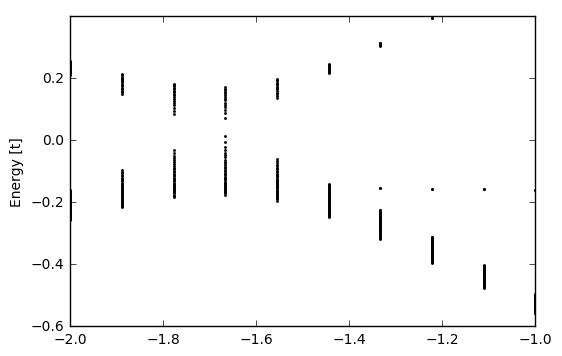

In [4]:
params = copy(ParametersSet5)
params.lBinv2 = 1. / 80.**2

evals, evecs = pSweep_1D( fsys_1D, params, -2., -1., pCount=10, yORzSweep = 'pzSweep')
spectrum_plot_1D(evals, -2., -1., pCount = 10)

In [6]:
params = copy(ParametersSet5)
params.lBinv2 = 1. / 80.**2

pzStart = -1.64
pzEnd = 1.74
    
GridNumber = 5
for i in range(GridNumber):
    params.pz = pzStart + i * (pzEnd - pzStart) / (GridNumber-1)
    velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.12, pyGuess2 = 0.06, debug = True)
    print('{', params.pz, ',', velocityCash,sep='',end='},')

pyF = 0.07101064547908259
      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 0.07101064547908259
Energy = 3.02787778767e-06
Index = 43
Velocity calculated by differentiation is -0.438371505785
{-1.64,-0.43189497275},pyF = 0.08169998707041255
      converged: True
           flag: 'converged'
 function_calls: 4
     iterations: 3
           root: 0.08169998707041255
Energy = -5.29822946634e-06
Index = 66
Velocity calculated by differentiation is -0.028793345447
{-0.7949999999999999,-0.023543219789},pyF = 0.09436293232698237
      converged: True
           flag: 'converged'
 function_calls: 4
     iterations: 3
           root: 0.09436293232698237
Energy = -1.34453001425e-06
Index = 35
Velocity calculated by differentiation is -0.0347193122363
{0.050000000000000044,-0.0333747504581},pyF = 0.10660653417547654
      converged: True
           flag: 'converged'
 function_calls: 4
     iterations: 3
           root: 0.1066065341754765

In [9]:
params = copy(ParametersSet5)
params.lBinv2 = 1. / 80.**2

pzStart = -1.64
pzEnd = 1.74
    
GridNumber = 40
for i in range(GridNumber):
    params.pz = pzStart + i * (pzEnd - pzStart) / (GridNumber-1)
    velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.12, pyGuess2 = 0.06)
    print('{', params.pz, ',', velocityCash,sep='',end='},')

{-1.64,-0.450740511315},{-1.5533333333333332,-0.0252354213547},{-1.4666666666666666,-0.0125452023354},{-1.38,-0.0109766985702},{-1.2933333333333332,-0.0119017898582},{-1.2066666666666666,-0.0136531492584},{-1.1199999999999999,-0.0157087664854},{-1.0333333333333332,-0.0178537187215},{-0.9466666666666665,-0.0199805298321},{-0.86,-0.0220268991372},{-0.7733333333333333,-0.0239526697318},{-0.6866666666666665,-0.0257303526717},{-0.5999999999999999,-0.0273410295104},{-0.5133333333333332,-0.0287725376965},{-0.4266666666666665,-0.0300184093598},{-0.3400000000000001,-0.0310764294299},{-0.2533333333333332,-0.0319458362251},{-0.16666666666666652,-0.0326228569687},{-0.08000000000000007,-0.033095927979},{0.006666666666666821,-0.0333437955942},{0.09333333333333327,-0.0333393242356},{0.18000000000000016,-0.0330579761191},{0.26666666666666683,-0.0324858170839},{0.3533333333333333,-0.0316223327641},{0.44000000000000017,-0.0304777747035},{0.5266666666666666,-0.029068159417},{0.6133333333333335,-0.0274109

## Several additional points, in order to make the approximation better

In [21]:
params.pz = pzStart + 0.2 * (pzEnd - pzStart) / (GridNumber-1)
velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.08, pyGuess2 = 0.07)
print('{', params.pz, ',', velocityCash,sep='',end='},')

params.pz = pzStart + 0.4 * (pzEnd - pzStart) / (GridNumber-1)
velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.08, pyGuess2 = 0.07)
print('{', params.pz, ',', velocityCash,sep='',end='},')

params.pz = pzStart + 0.6 * (pzEnd - pzStart) / (GridNumber-1)
velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.08, pyGuess2 = 0.07)
print('{', params.pz, ',', velocityCash,sep='',end='},')

params.pz = pzStart + 0.8 * (pzEnd - pzStart) / (GridNumber-1)
velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.08, pyGuess2 = 0.07)
print('{', params.pz, ',', velocityCash,sep='',end='},')

params.pz = pzStart + 1.5 * (pzEnd - pzStart) / (GridNumber-1)
velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.08, pyGuess2 = 0.07)
print('{', params.pz, ',', velocityCash,sep='',end='},')

{-1.6226666666666665,-0.132335233088},{-1.6053333333333333,-0.0699991319258},{-1.5879999999999999,-0.0454728220741},{-1.5706666666666667,-0.0327562986728},{-1.5099999999999998,-0.0160694440442},

## Increasing the number of lattice sites gives essentially the same result

In [15]:
paramsRefine = copy(ParametersSet5)
fsys_1DRefine = diagonalizer.FinalizedSystem_1D(2000)
paramsRefine.x_shift= (2000 - 1.)/2.
paramsRefine.lBinv2 = 1. / 80.**2

pzStart = -1.64
pzEnd = 1.74
    
GridNumber = 40
paramsRefine.pz = pzStart + 1 * (pzEnd - pzStart) / (GridNumber-1)
velocityCash = FermiVelocityZQL(fsys_1DRefine, paramsRefine, pyGuess = 0.16, pyGuess2 = 0.10)
print('{', paramsRefine.pz, ',', velocityCash,sep='',end='},')

{-1.5533333333333332,-0.0252343523829},